In [63]:
# Import the Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')
%matplotlib inline

In [64]:
# Load the data
data=pd.read_csv('Passanger_booking_data.csv')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


# Data Preprocessing
- In the data preprocessing phase, we first examined the shape of the data to understand its dimensions. 
- Next, we checked for null values in the dataset and removed them if any were found. 
- Additionally, we performed a check for duplicate values and replaced them to ensure data integrity.
- To gain insights into the relationships between different variables, we visualized the correlation map using a heatmap. This visualization allowed us to identify patterns and dependencies among the features in the dataset, helping us understand the interplay between various attribute

In [65]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [66]:
data.shape

(50002, 14)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [68]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [69]:
# Checking the null values in the dataset
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [70]:
# Checking the duplicate values in the data
duplicate_values=data.duplicated().sum()
duplicate_values

719

In [71]:
# drop the duplicate values in the dataset we using the pandas function
data=data.drop_duplicates()
data.shape

(49283, 14)

# About the DataSet
- #### Data Size: The dataset contains 50002 rows and 14 columns.
- #### Data Types: The data contains features with data types int64, Object, Binary and float64.
- #### Missing Values: No column has missing values in the dataset, which is a great sign and simplifies the data cleaning process.
- #### Unique Values: The number of unique values varies among features.
- #### Statistical Details: The 'min', 'max', 'average', and 'standard deviation' values indicate the range and dispersion of data for each column, highlighting potential outliers or anomalies.
- #### Irrelevant Features: All the Features seems important and useful for final evaluation.

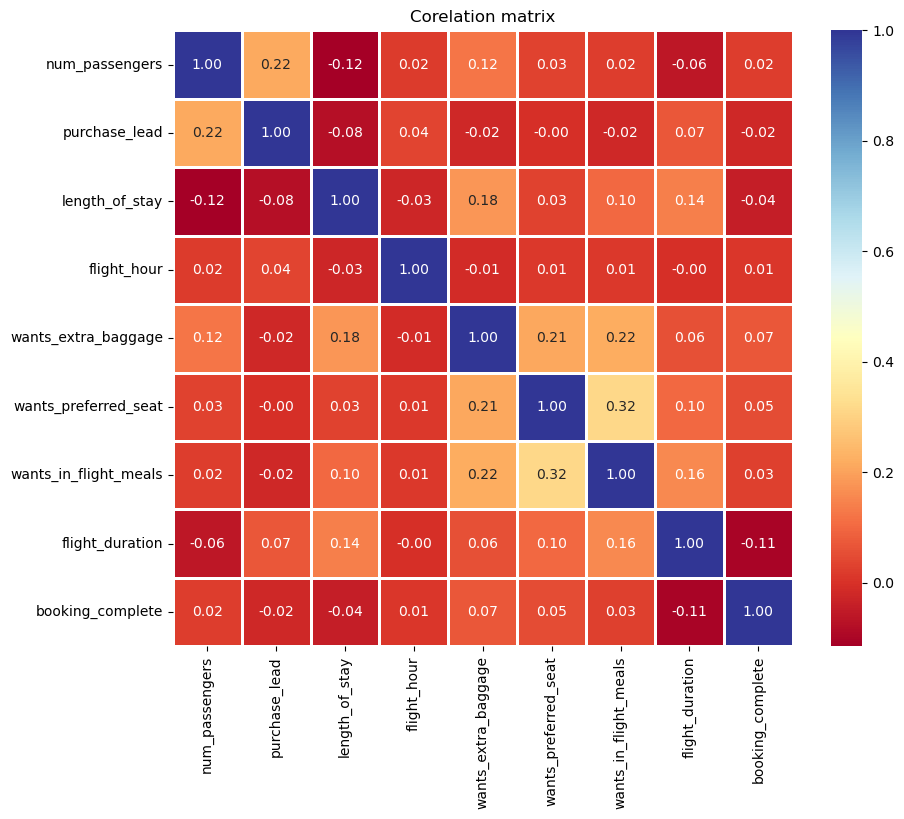

In [72]:
# Visualize the correlation map
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlBu',fmt='.2f',
    annot_kws=None,
    linewidths=1,)
plt.title("Corelation matrix")
plt.show()

# Explore Data Analysis

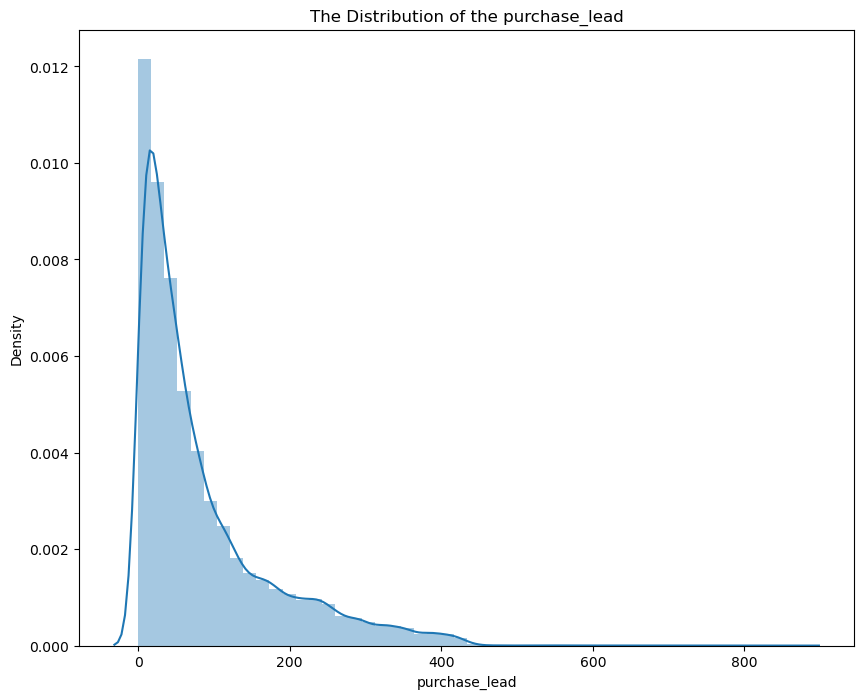

In [73]:
# Distribution of the num of passengers in the data
plt.figure(figsize=(10,8))
sns.distplot(data['purchase_lead'],hist=True,bins=50)
plt.title("The Distribution of the purchase_lead")
plt.show()

Text(0, 0.5, 'Count of values')

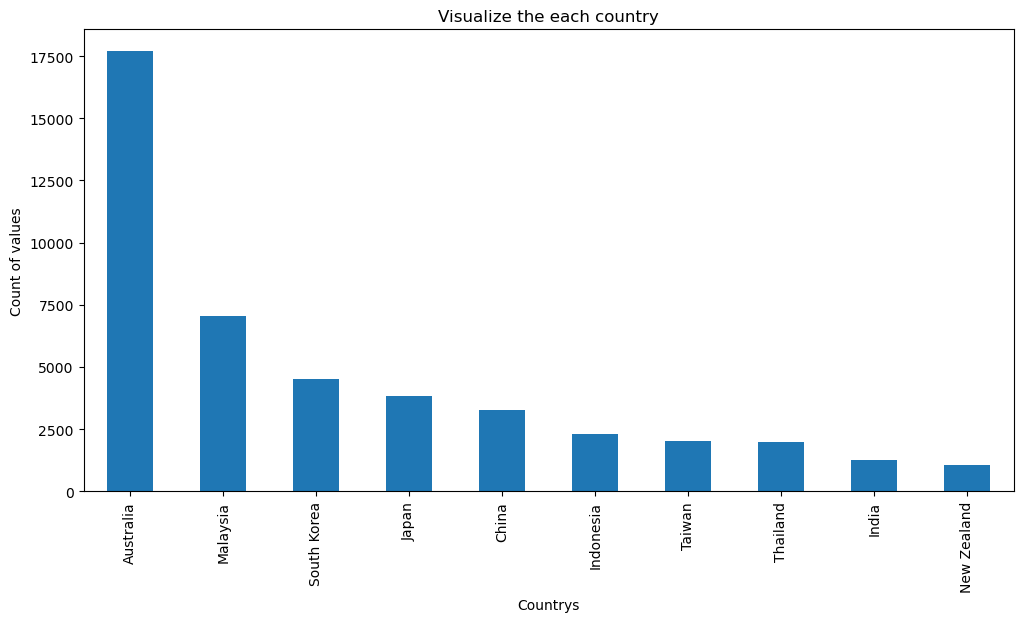

In [74]:
# Create a bar plot visualize the top 10 most demanding origin 
data['booking_origin'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=(12,6))
plt.title("Visualize the each country")
plt.xlabel("Countrys")
plt.xticks(rotation=90)
plt.ylabel("Count of values")

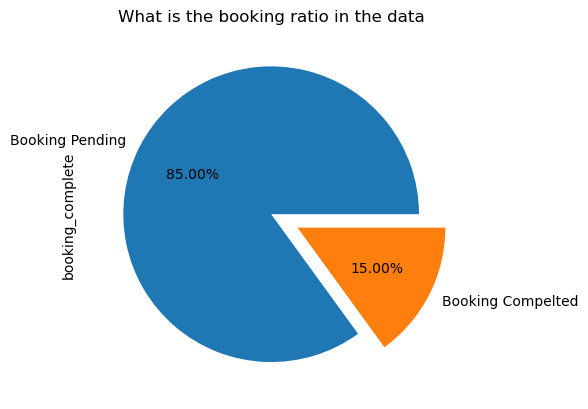

In [75]:
# Using the pie chart understand the how much precentage is complete there bookings
data['booking_complete'].value_counts().plot(kind='pie',
    explode=[0,0.2],
    labels=['Booking Pending',"Booking Compelted"],
    autopct='%1.2f%%')
plt.title("What is the booking ratio in the data")
plt.show()

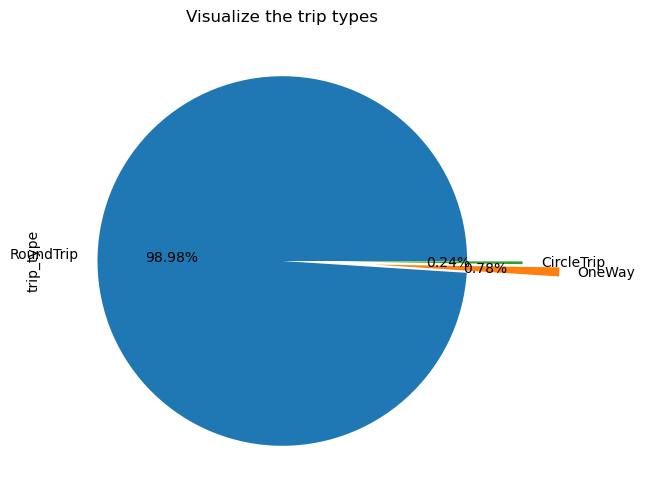

In [76]:
# How much percentage people intrested in the trip types
trip_type=['trip_type']
for i,col in enumerate(trip_type):
    plt.figure(figsize=(10,6))
    data[col].value_counts().plot(kind='pie',explode=[0,0.5,0.3],
    labels=['RoundTrip',"OneWay",'CircleTrip'],
    autopct='%1.2f%%')
plt.title("Visualize the trip types")
plt.show()

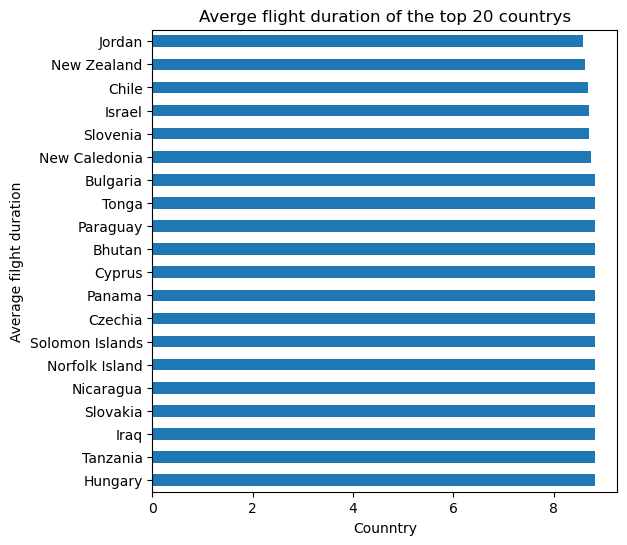

In [77]:
# Find the average flight duration of the top 20 destination in the bar charts
data.groupby('booking_origin')['flight_duration'].mean().sort_values(ascending=False).nlargest(20)\
.plot(kind='barh',figsize=(6,6))
plt.title("Averge flight duration of the top 20 countrys")
plt.xlabel("Counntry")
plt.ylabel("Average filght duration")
plt.show()

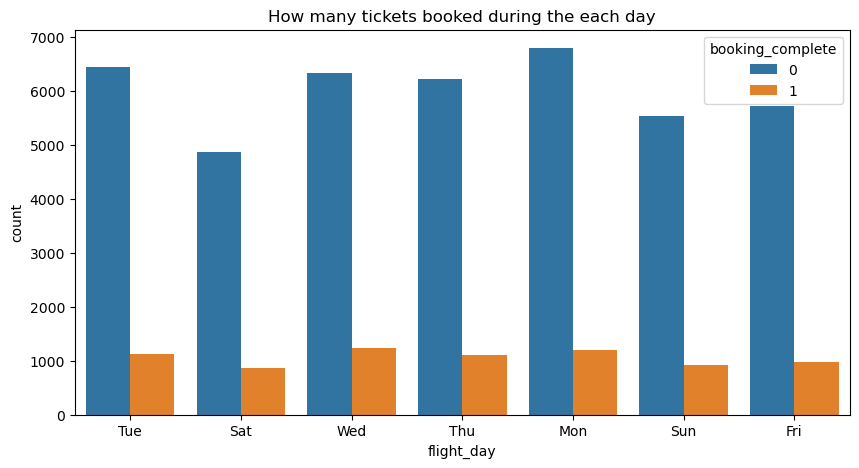

In [78]:
# Create countplot understand the booking status on the flight day
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='flight_day',hue='booking_complete')
plt.title("How many tickets booked during the each day")
plt.show()

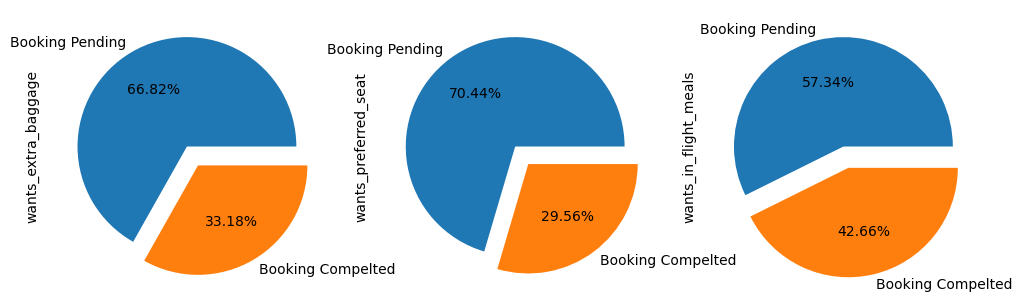

In [79]:
# Create a data frame for the extra 
df=['wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals']
plt.figure(figsize=(12,5))
for i,col in enumerate(df):
    plt.subplot(1,3,i+1)
    data[col].value_counts().plot(kind='pie',explode=[0,0.2],
    labels=['Booking Pending',"Booking Compelted"],
    autopct='%1.2f%%')

Text(0.5, 1.0, 'Find the how much percentage of booking completed through the channel')

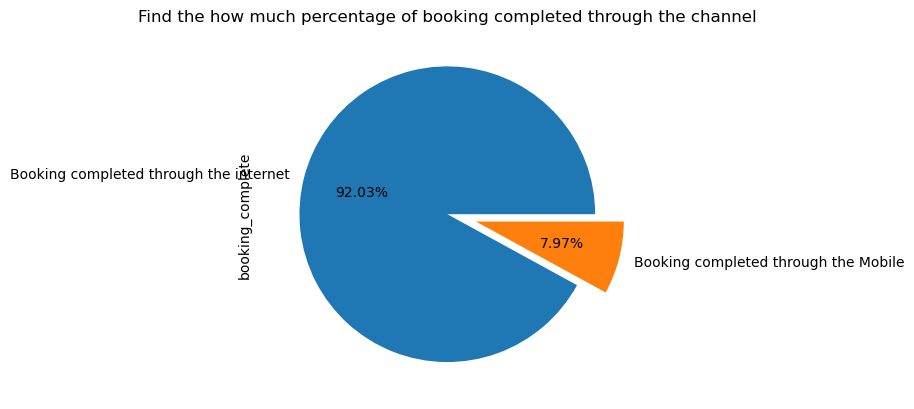

In [80]:
# Let's Compare How much percentage of the booking complete through mobile and internet
data.groupby('sales_channel')['booking_complete'].sum().plot(kind='pie',
    explode=[0,0.2],
    labels=['Booking completed through the internet',"Booking completed through the Mobile"],
    autopct='%1.2f%%')
plt.title("Find the how much percentage of booking completed through the channel")

In [81]:
# create a separate data frame for Roundtrip and find the which day most of the tickets are booked
roundtrip=data[data['trip_type']=='RoundTrip']
roundtrip.groupby(['flight_day'])[['booking_complete']].value_counts().sort_values(ascending=False)

flight_day  booking_complete
Mon         0                   6724
Tue         0                   6350
Wed         0                   6267
Thu         0                   6151
Fri         0                   5647
Sun         0                   5465
Sat         0                   4809
Wed         1                   1222
Mon         1                   1191
Tue         1                   1115
Thu         1                   1104
Fri         1                    971
Sun         1                    911
Sat         1                    853
dtype: int64

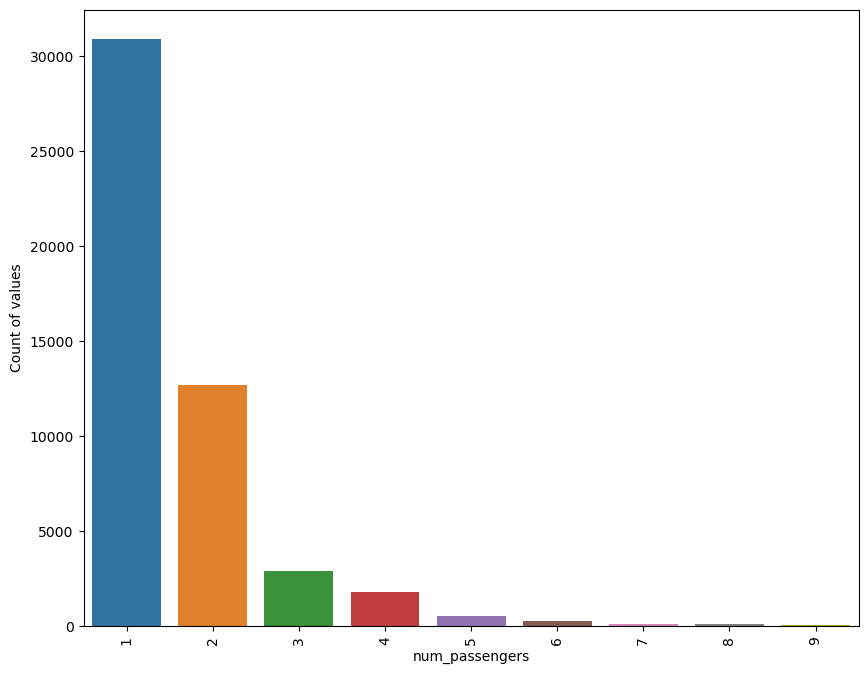

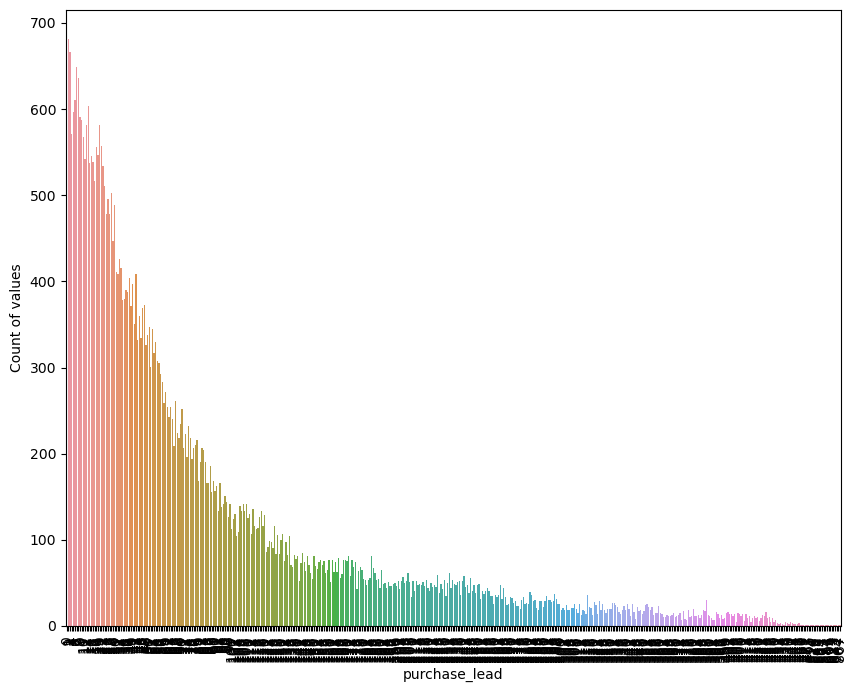

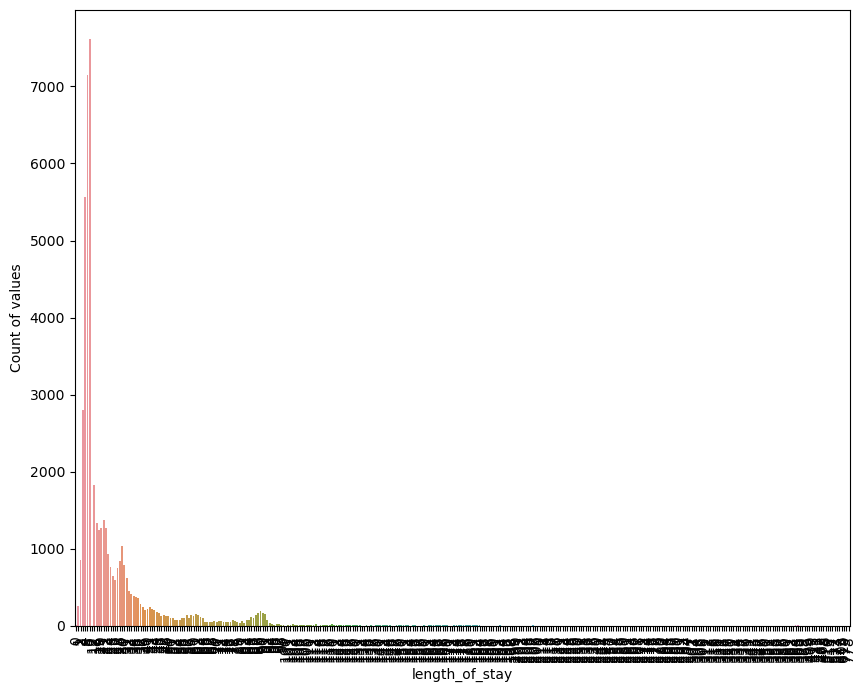

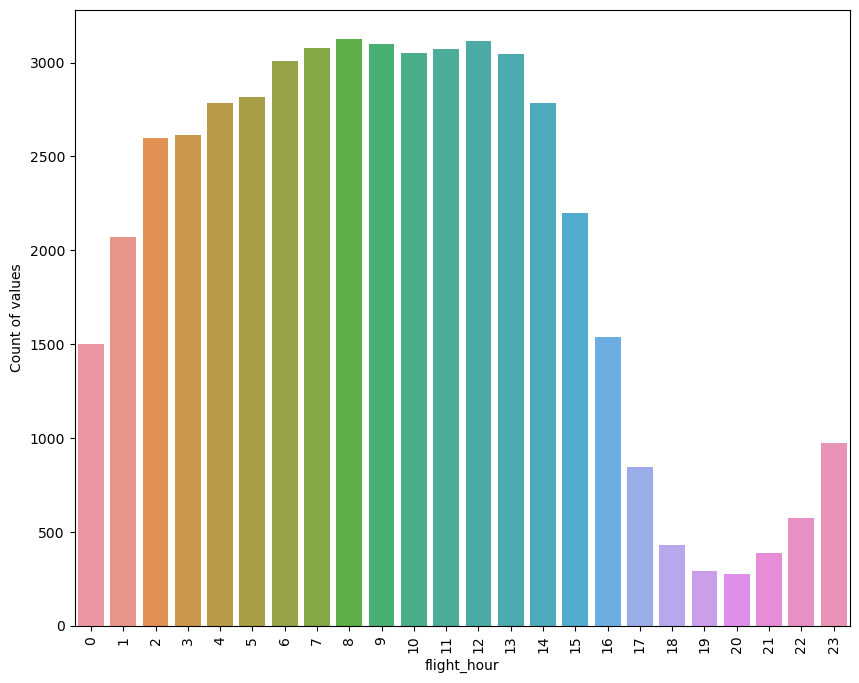

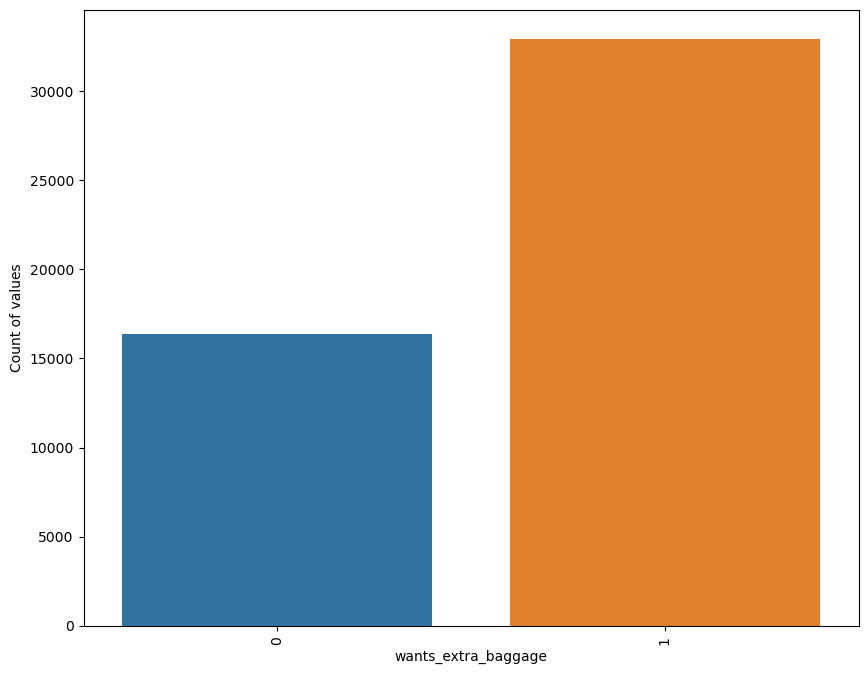

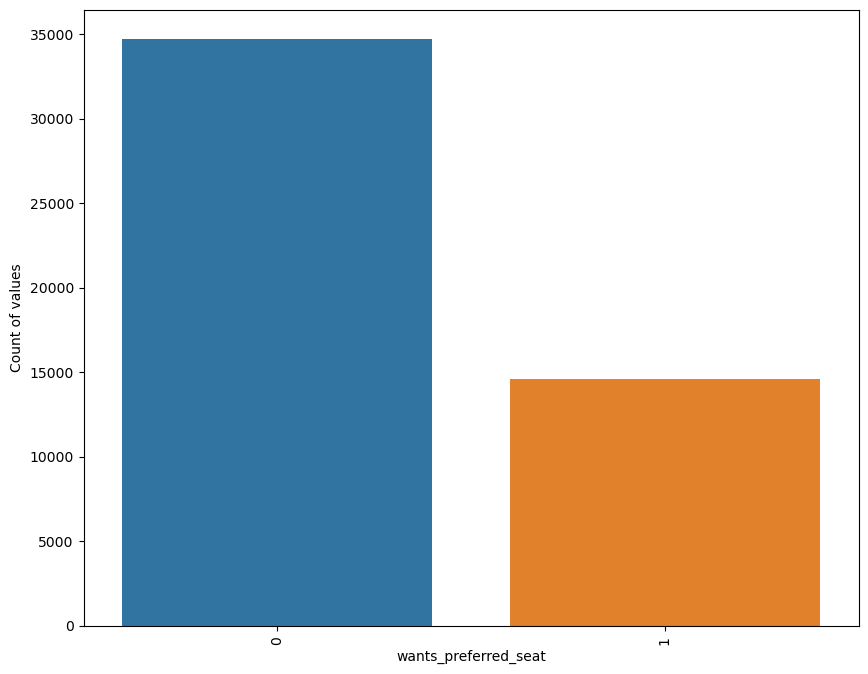

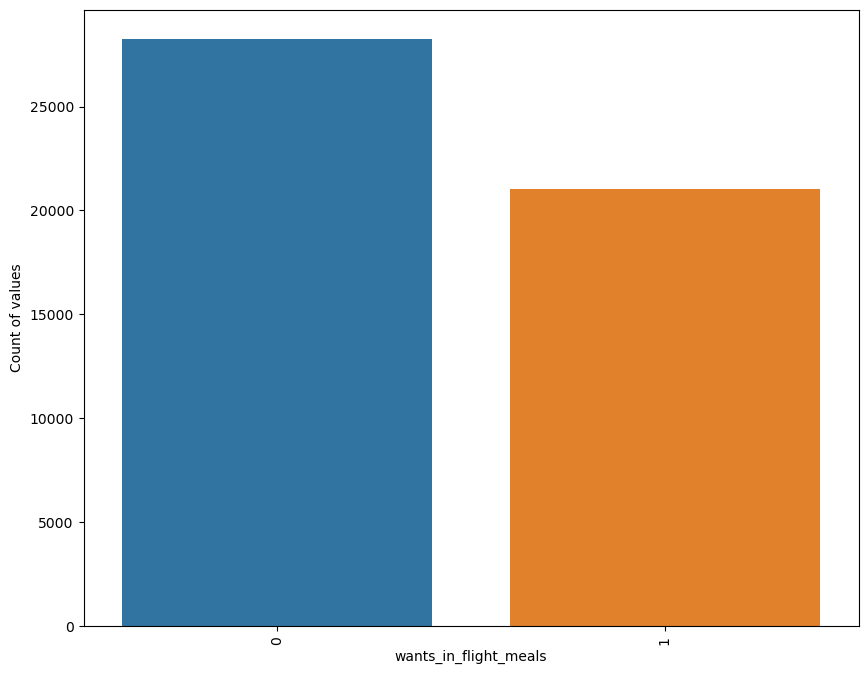

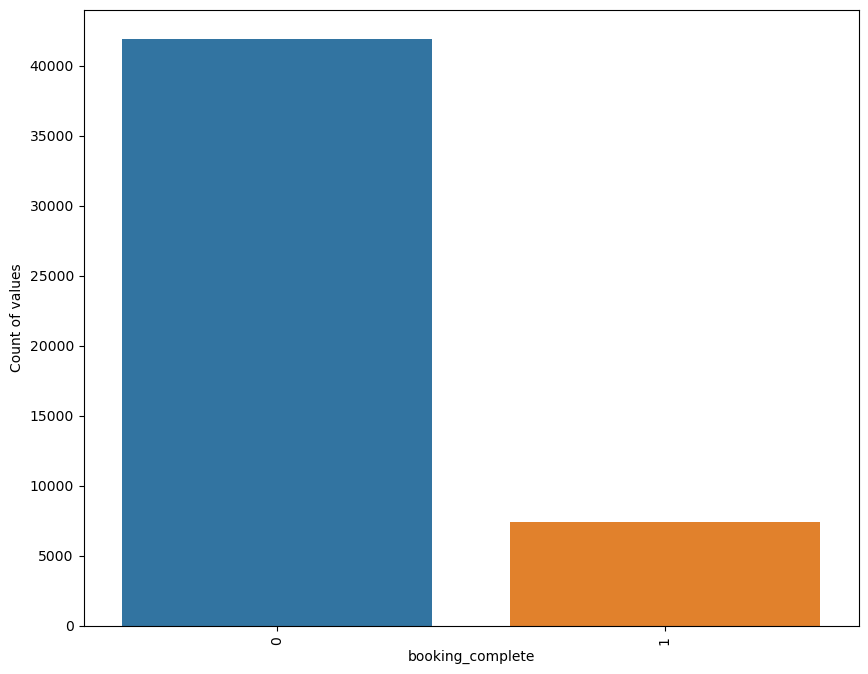

In [82]:

# Create a countplot to understand the each columns values in the data 
for i in data.select_dtypes(include='int'):
    plt.figure(figsize=(10,8))
    sns.countplot(data=data,x=data[i])
    plt.xlabel(f'{i}')
    plt.ylabel('Count of values')
    plt.xticks(rotation=90)
    plt.show()

In [83]:
# Using the groupby function we find the how many bookings are done in each day trough internet and mobile
data.groupby(['sales_channel'])[['flight_day']].value_counts().sort_values(ascending=False)


sales_channel  flight_day
Internet       Mon           7197
               Wed           6835
               Tue           6827
               Thu           6606
               Fri           5897
               Sun           5591
               Sat           4965
Mobile         Sun            851
               Mon            791
               Fri            788
               Sat            758
               Tue            732
               Wed            728
               Thu            717
dtype: int64

In [84]:
# Using the pivot table find the each origin and day which day most ticket are booked.
pd.pivot_table(data,index='booking_origin',columns='flight_day',values='booking_complete',aggfunc='mean')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),0.272727,0.000000,1.000000,0.166667,0.076923,0.076923,0.428571
Afghanistan,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
Argentina,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
Australia,0.043275,0.050264,0.053197,0.049311,0.054953,0.050225,0.052612
...,...,...,...,...,...,...,...
United Arab Emirates,0.000000,0.200000,0.000000,0.000000,0.000000,0.166667,0.166667
United Kingdom,0.190476,0.037037,0.058824,0.125000,0.129032,0.085714,0.230769
United States,0.152542,0.117647,0.157895,0.230769,0.263889,0.179487,0.174419


# Observations:
- During the Exploratory Data Analysis (EDA) phase, we identified several interesting insights.
- The distribution plot revealed that the majority of purchase leads fall within the range of 200 to 400.
- Australia recorded the highest number of purchase leads, followed by Malaysia in second place.
- Only 15% of the leads resulted in ticket bookings, indicating that 85% did not convert.
- Countries like Jordan and New Zealand had a higher average flight duration compared to others.
- The pie chart showed that 92% of bookings were completed through the internet, while 8% were completed via mobile devices.

# Machine Learning Modeling
- Firstly, we utilized the label encoder to convert categorical columns into numerical values, enabling us to work with these features in our machine learning models.

- Next, we divided the data into independent and dependent variables. To ensure uniformity in the data, we applied normalization techniques.

- Subsequently, we split the data into training and testing sets, reserving 25% of the data for testing purposes, thus allowing us to evaluate the model's performance on unseen data.

- We then proceeded to create a function for machine learning modeling. With this function, we could apply various classification algorithms to the data and compare their performance to determine the most suitable model for our task.

In [85]:
# Import the all required libraries for machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# Covert the categorical data into the numerical using the labelencoder
for col in data.select_dtypes(include='object').columns:
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

In [87]:
#Divided the data into independent and dependent variables
X=data.drop(['booking_complete','purchase_lead','route'],axis=1)
y=data['booking_complete']
# Scalling the data 
scaler=StandardScaler()
X=scaler.fit_transform(X)
#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=120)

In [89]:
# Create a function for machine learning model
def model_bulding(model,X_train,X_test,y_train,y_test):
    print(f'Name of the {model}')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    print(f'\nThe Accuracy_score is {score*100:.2f}')
    print(f'\n{classification_report(y_test,y_pred)}')
    print(f'\n{confusion_matrix(y_test,y_pred)}')
    print('__'*30)

In [90]:
# Create all model into the dictionary formate
models={
    'logistic':LogisticRegression(),
    'decisiontree':DecisionTreeClassifier(),
    'radnom':RandomForestClassifier(),
    'Kneighbors':KNeighborsClassifier()
          }

In [91]:
# Then iterating through the each model and visualize the classification and confusion reports
for i in range(len(models)):
    model=list(models.values())[i]
    name=list(models.keys())[i]
    model_bulding(model,X_train,X_test,y_train,y_test)

Name of the LogisticRegression()

The Accuracy_score is 84.95

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8374
           1       0.00      0.00      0.00      1483

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857


[[8374    0]
 [1483    0]]
____________________________________________________________
Name of the DecisionTreeClassifier()

The Accuracy_score is 76.97

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8374
           1       0.26      0.29      0.28      1483

    accuracy                           0.77      9857
   macro avg       0.57      0.57      0.57      9857
weighted avg       0.78      0.77      0.77      9857


[[7155 1219]
 [1051  432]]
____________________________________________________________
Name of the RandomForestClassifier()



# Model Evaluation
1.LogisticRegression() : Accuracy_score is **84.95** <br>
2.DecisionTreeClassifier(): Accuracy_score is **76.97** <br>
3.RandomForestClassifier(): Accuracy_score is **83.67** <br>
4.KNeighborsClassifier(): Accuracy_score is **83.44** <br>